# 

In [2]:
pip install selenium

  Using cached selenium-4.24.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached trio-0.26.2-py3-none-any.whl.metadata (8.6 kB)
  Using cached trio_websocket-0.11.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Using cached selenium-4.24.0-py3-none-any.whl (9.6 MB)
Using cached trio-0.26.2-py3-none-any.whl (475 kB)
Using cached trio_websocket-0.11.1-py3-none-any.whl (17 kB)
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: w

In [3]:
pip install webdriver-manager

  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install webdriver-manager


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install webdriver-manager selenium --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL
base_url = "https://www.electromaps.com/en/charging-stations/netherlands/amsterdam/amsterdam?page={}"

# Open a CSV file for writing
with open('amsterdam_charging_stations.csv', 'w', newline='') as csvfile:
    fieldnames = ['Station Name', 'Address', 'Connector Type', 'Quantity']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    page = 1  # Start with page 1
    while True:
        # Fetch the page content
        url = base_url.format(page)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all station items on the page
        stations = soup.find_all('a', class_='chargepoints-stations-item')

        if not stations:
            print(f"No data found on page {page}. Stopping.")
            break

        # Loop through stations and extract data
        for station in stations:
            station_name = station.find('h3', class_='xs').text.strip()

            # Adjust the class name for the address
            address_tag = station.find('div', class_='chargepoints-stations-text').find('div', class_='body-m')
            address = address_tag.text.strip() if address_tag else "N/A"

            print(address)

            # Check for connector type
            connector_tag = station.find('div', class_='charging-point-type')
            connector = connector_tag['title'] if connector_tag else "N/A"

            # Check for quantity
            quantity_tag = station.find('div', class_='body-s bold')
            quantity = quantity_tag.text.strip() if quantity_tag else "N/A"

            # Write the data to CSV
            writer.writerow({
                'Station Name': station_name,
                'Address': address,
                'Connector Type': connector,
                'Quantity': quantity
            })

        print(f"Page {page} scraped successfully.")
        page += 1  # Increment the page number


3C Thomas R. Malthusstraat 1066 JR
701 Parnassusweg 1077 DG
5 Bornhout 1046 PP
21 Australiëhavenweg 1045 BA
10 Hanedastraat 1043 DH
10 Hanedastraat 1043 DH
300 Parnassusweg 1081 LC
18 Oude Haagseweg 1066 BW
18 Oude Haagseweg 1066 BW
136 Narva-eiland 1014 ZJ
3C Thomas R. Malthusstraat 1066 JR
6 Amstelplein 1097 DZ
6 Amstelplein 1097 DZ
111 Johan Huizingalaan 1066 VH
111 Johan Huizingalaan 1066 VH
75A1 Klaprozenweg 1033 NN
75A1 Klaprozenweg 1033 NN
20 Amstelstroomlaan 1096 GG
20 Amstelstroomlaan 1096 GG
74 Transformatorweg 1014 AK
Page 1 scraped successfully.
74 Transformatorweg 1014 AK
80B Duivendrechtsekade 1096 AH
700 Bijlmerplein 1102 MA
12 Haaksbergweg 1101 BX
1 Olympisch Stadion 1076 DE
2A Linnaeusstraat 1092 CK
1 George Gershwinlaan 1082 LC
1 George Gershwinlaan 1082 LC
76 Nes 1012 KE
76 Nes 1012 KE
Hornweg 1044
34e Tt. Vasumweg 1033 SC
1 Middenweg 1098 AA
34e Tt. Vasumweg 1033 SC
55 Rokin 1012 KK
7 Korte Ouderkerkerdijk 1096 GB
21 Piet Heinkade 1019 BR
1 Olympisch Stadion 1076 DE

In [ ]:
# Traffic Data

In [3]:
import requests
from bs4 import BeautifulSoup

# URL of the TomTom Traffic Index page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"

# Send an HTTP request to get the page content
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Example: Find data points from specific elements (adjust based on actual tags)
traffic_data = soup.find_all('div', class_='some-class')  # Replace 'some-class' with actual class names

# Loop through and print the traffic data
for data in traffic_data:
    print(data.text.strip())



In [4]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the TomTom Traffic Index page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"

# Send an HTTP request to get the page content
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Open a CSV file for writing
with open('amsterdam_traffic_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Data Label', 'Value']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Find specific traffic data (you need to adjust based on the actual HTML structure)
    # Replace 'some-class' with the actual class name after inspecting the webpage
    traffic_data = soup.find_all('div', class_='some-class')

    # Loop through and extract data
    for data in traffic_data:
        label = data.find('span', class_='label-class').text.strip()  # Replace 'label-class'
        value = data.find('span', class_='value-class').text.strip()  # Replace 'value-class'
        
        # Write the data to the CSV
        writer.writerow({
            'Data Label': label,
            'Value': value
        })

print("Data saved to amsterdam_traffic_data.csv")


Data saved to amsterdam_traffic_data.csv


In [6]:
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import time

# Initialize WebDriver
driver = webdriver.Chrome()

# Navigate to the page
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Parse the page using BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Example: scraping tables (adjust based on actual structure)
tables = soup.find_all('table')  # Replace with the correct tag/class

# Open a CSV file for writing
with open('amsterdam_traffic_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    # Iterate through the tables and rows
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            data = [col.text.strip() for col in cols]
            writer.writerow(data)

print("Data saved to amsterdam_traffic_data.csv")

# Close the WebDriver
driver.quit()


Data saved to amsterdam_traffic_data.csv


In [14]:
import requests

url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/
params = {
    "bbox": "4.728,52.278,5.104,52.431",  # Example coordinates for Amsterdam
    "zoom": "12",  # Zoom level
    "key": "hh1Tv7pJmimDnDa9kJ4UYFDNfiIFhgP7"  # Replace with your API key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")


SyntaxError: unterminated string literal (detected at line 3) (572509069.py, line 3)

In [15]:
https://{baseURL}/traffic/trafficstats/trafficdensity/{versionNumber}?key={Your_API_Key}

SyntaxError: invalid syntax (3443316816.py, line 1)

In [17]:
import requests

# Correct API URL with version number
url = "https://api.tomtom.com/trafficstats/trafficdensity/1"  # Adjust the version number if needed

# Correct parameters, including the proper bbox (bounding box coordinates)
params = {
    "key": "hh1Tv7pJmimDnDa9kJ4UYFDNfiIFhgP7",  # Your valid API key
    "bbox": "4.728,52.278,5.104,52.431",  # Example bounding box for Amsterdam
    "zoom": "12"  # Zoom level (adjust based on needs)
}

# Send GET request
response = requests.get(url, params=params)

# Check the response
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}, Message: {response.text}")


Error: 596, Message: <h1>596 Service Not Found</h1>


In [20]:
pip install pymupdf

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
    --------------------------------------- 0.1/3.2 MB 656.4 kB/s eta 0:00:05
   ---- ----------------------------------- 0.3/3.2 MB 2.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.8/3.2 MB 4.6 MB/s eta 0:00:01
   ------------- -------------------------- 1.1/3.2 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.7/3.2 MB 6.3 MB/s eta 0:00:01
   --------------------------- ------------ 2.2/3.2 MB 7.1 MB/s eta 0:00:01
   --------------------------------- ------ 2.7/3.2 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.2 MB 10.9 MB/s eta 0:00:02
   --- ---------------------

In [22]:
import fitz  # PyMuPDF
import re

# Path to the uploaded PDF file
pdf_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Statistics-electric-vehicles-and-charging-in-the-Netherlands-up-to-and-including-June-2022.pdf'

# Open the PDF
pdf_document = fitz.open(pdf_file_path)

# Extract text from all pages
pdf_text = ""
for page_num in range(len(pdf_document)):
    page = pdf_document.load_page(page_num)
    pdf_text += page.get_text()

# Define regex patterns for extracting data (fleet size, new sales, monthly growth)
fleet_size_pattern = re.compile(r"Fleet size\s*:?\s*([\d,]+)")
new_sales_pattern = re.compile(r"New sales\s*:?\s*([\d,]+)")
monthly_growth_pattern = re.compile(r"Monthly Growth\s*:?\s*([\d\.%]+)")

# Extract values from the text using the defined patterns
fleet_size = re.search(fleet_size_pattern, pdf_text)
new_sales = re.search(new_sales_pattern, pdf_text)
monthly_growth = re.search(monthly_growth_pattern, pdf_text)

# Extracted values or "N/A" if not found
fleet_size_value = fleet_size.group(1) if fleet_size else "N/A"
new_sales_value = new_sales.group(1) if new_sales else "N/A"
monthly_growth_value = monthly_growth.group(1) if monthly_growth else "N/A"

# Print the extracted data
print(f"Fleet Size: {fleet_size_value}")
print(f"New Sales: {new_sales_value}")
print(f"Monthly Growth: {monthly_growth_value}")


FileNotFoundError: no such file: 'C:\Users\navin\OneDrive\Desktop\Ironhack\Statistics-electric-vehicles-and-charging-in-the-Netherlands-up-to-and-including-June-2022.pdf'

In [23]:
import requests

# Replace this with the actual CSV download link
url = "https://maps.amsterdam.nl/verkeersprognoses?download=csv"

response = requests.get(url)

# Save the file locally
with open('traffic_forecast_amsterdam.csv', 'wb') as file:
    file.write(response.content)

print("CSV file downloaded successfully.")


CSV file downloaded successfully.


In [24]:
import requests
import geojson

# GeoJSON link (replace with actual link)
geojson_url = "https://maps.amsterdam.nl/verkeersprognoses/geojson"

response = requests.get(geojson_url)
geojson_data = geojson.loads(response.text)

# Process or save the GeoJSON data
with open('traffic_forecast_amsterdam.geojson', 'w') as geojson_file:
    geojson.dump(geojson_data, geojson_file)

print("GeoJSON file downloaded successfully.")


ModuleNotFoundError: No module named 'geojson'

In [25]:
pip install geojson

In [27]:
import requests

# Replace this with the actual GeoJSON download link
geojson_url = "https://maps.amsterdam.nl/verkeersprognoses/geojson"

# Send the request
response = requests.get(geojson_url)

# Check the status code
if response.status_code == 200:
    # Check the content type to ensure it's JSON or GeoJSON
    if 'application/json' in response.headers.get('Content-Type', ''):
        # Try to load the GeoJSON data
        geojson_data = response.json()
        
        # Save the GeoJSON data to a file
        with open('traffic_forecast_amsterdam.geojson', 'w') as geojson_file:
            geojson.dump(geojson_data, geojson_file)

        print("GeoJSON file downloaded successfully.")
    else:
        print("Response content is not in JSON format.")
else:
    print(f"Failed to retrieve the data. Status code: {response.status_code}")
    print(f"Response content: {response.text}")


Failed to retrieve the data. Status code: 404
Response content: 
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<HTML><HEAD>
<TITLE>404 Niet gevonden</TITLE>
</HEAD><BODY>
<H1>Deze kaart bestaat niet (meer)</H1>
</BODY></HTML>




























































































































































































































































 




In [32]:
import requests

# SerpApi base URL for Google Maps Directions
url = "https://serpapi.com/search"

# Define a list of travel modes (with their corresponding numbers)
travel_modes = {
    "driving": 0,
    "walking": 2,
    "cycling": 1
}

# Loop through each travel mode and make an API request
for mode, mode_value in travel_modes.items():
    # Define the parameters for each API request
    params = {
        "engine": "google_maps_directions",  # Google Maps Directions engine
        "start_addr": "Amsterdam Central Station, Amsterdam, Netherlands",  # Starting point
        "end_addr": "Rijksmuseum, Amsterdam, Netherlands",  # Ending point
        "travel_mode": mode_value,  # Set travel mode to the corresponding number
        "api_key": "189c2f6d22a613f747c85d66c1fb3b540ca090c8db4bb2b48bcccf811adc7c04",  # Replace with your SerpApi API key
    }

    # Make the GET request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Access directions and other details from the response
        directions = data.get("directions", [])
        
        # Print out the directions for each travel mode
        print(f"\nTravel Mode: {mode.capitalize()}")
        for direction in directions:
            print(f"Distance: {direction['formatted_distance']}")
            print(f"Duration: {direction['formatted_duration']}")
    else:
        print(f"Error: {response.status_code}")
        print(f"Response content: {response.text}")



Travel Mode: Driving
Distance: 6.1 km
Duration: 22 min
Distance: 7.4 km
Duration: 24 min
Distance: 7.1 km
Duration: 26 min

Travel Mode: Walking
Distance: 2.5 km
Duration: 34 min
Distance: 3.0 km
Duration: 42 min
Distance: 3.1 km
Duration: 43 min

Travel Mode: Cycling
Distance: 2.5 km
Duration: 8 min
Distance: 2.5 km
Duration: 8 min
Distance: 2.7 km
Duration: 8 min


In [33]:
import requests
import csv

# SerpApi base URL for Google Maps Directions
url = "https://serpapi.com/search"

# Define a list of travel modes (with their corresponding numbers)
travel_modes = {
    "driving": 0,
    "walking": 2,
    "cycling": 1
}

# Open a CSV file for writing
with open('amsterdam_directions.csv', 'w', newline='') as csvfile:
    fieldnames = ['Travel Mode', 'Distance', 'Duration']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Loop through each travel mode and make an API request
    for mode, mode_value in travel_modes.items():
        # Define the parameters for each API request
        params = {
            "engine": "google_maps_directions",  # Google Maps Directions engine
            "start_addr": "Amsterdam Central Station, Amsterdam, Netherlands",  # Starting point
            "end_addr": "Rijksmuseum, Amsterdam, Netherlands",  # Ending point
            "travel_mode": mode_value,  # Set travel mode to the corresponding number
            "api_key": "189c2f6d22a613f747c85d66c1fb3b540ca090c8db4bb2b48bcccf811adc7c04",  # Replace with your SerpApi API key
        }

        # Make the GET request
        response = requests.get(url, params=params)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Access directions and other details from the response
            directions = data.get("directions", [])

            # Write each direction to the CSV file
            for direction in directions:
                writer.writerow({
                    'Travel Mode': mode.capitalize(),
                    'Distance': direction['formatted_distance'],
                    'Duration': direction['formatted_duration']
                })
        else:
            print(f"Error: {response.status_code}")
            print(f"Response content: {response.text}")

print("Data saved to amsterdam_directions.csv")


Data saved to amsterdam_directions.csv


In [34]:
import requests
import csv

# TomTom API base URL
url = "https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json"

# API request parameters
params = {
    "point": "52.377956,4.897070",  # Coordinates of the location (Amsterdam)
    "unit": "KMPH",  # Speed unit
    "openLr": "false",  # Optional parameter
    "key": "SOoYlkyyMIcGNAaIgeGi8HAJLqeWC1Ld"  # Replace with your TomTom API key
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract relevant fields from the response
    flow_data = data.get("flowSegmentData", {})
    current_speed = flow_data.get("currentSpeed", "N/A")
    free_flow_speed = flow_data.get("freeFlowSpeed", "N/A")
    current_travel_time = flow_data.get("currentTravelTime", "N/A")
    free_flow_travel_time = flow_data.get("freeFlowTravelTime", "N/A")
    coordinates = flow_data.get("coordinates", {}).get("coordinate", [])

    # Prepare CSV file for writing
    with open('amsterdam_traffic_data.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Current Speed (KMPH)', 'Free Flow Speed (KMPH)', 'Current Travel Time (seconds)', 'Free Flow Travel Time (seconds)', 'Coordinates'])

        # Write the traffic data
        writer.writerow([current_speed, free_flow_speed, current_travel_time, free_flow_travel_time, coordinates])

    print("Data saved to 'amsterdam_traffic_data.csv'")
else:
    print(f"Error: {response.status_code}")


Data saved to 'amsterdam_traffic_data.csv'


In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import csv

# Path to the ChromeDriver
chrome_driver_path = '/path/to/chromedriver'  # Update with the correct path to your ChromeDriver

# Initialize the Chrome WebDriver using the Service class
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Open the TomTom Traffic Index page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)

# Give the page some time to fully load
time.sleep(5)  # Adjust the sleep time based on the loading speed of your internet

# Extract traffic data, for example, the "Live Congestion Level"
live_congestion_element = driver.find_element(By.XPATH, "//div[contains(@class, 'live-congestion')]/h2")
live_congestion = live_congestion_element.text

# Extract other relevant data from the page
avg_congestion_element = driver.find_element(By.XPATH, "//div[contains(@class, 'average-congestion')]/p")
avg_congestion = avg_congestion_element.text

# Save the scraped data into a CSV file
with open('amsterdam_traffic_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Live Congestion Level', 'Average Congestion Level'])
    writer.writerow([live_congestion, avg_congestion])

print("Data saved to 'amsterdam_traffic_data.csv'")

# Close the browser
driver.quit()


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [38]:
pip install webdriver-manager

In [39]:
from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.firefox.service import Service

service = Service(GeckoDriverManager().install())
driver = webdriver.Firefox(service=service)

# Now open the desired URL
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)


SessionNotCreatedException: Message: Expected browser binary location, but unable to find binary in default location, no 'moz:firefoxOptions.binary' capability provided, and no binary flag set on the command line


In [40]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

# Create an instance of Chrome Options
options = Options()

# Set the path to the Chrome binary manually
options.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"  # Update this with the actual path to your Chrome browser

# Use WebDriver Manager to install ChromeDriver
service = Service(ChromeDriverManager().install())

# Initialize the WebDriver with the specified binary
driver = webdriver.Chrome(service=service, options=options)

# Open the URL
driver.get("https://www.tomtom.com/traffic-index/amsterdam-traffic/")


In [41]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Initialize the Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the TomTom Traffic Index page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)

# Print the title to verify the page is loaded
print(driver.title)

# Close the browser
driver.quit()


Amsterdam traffic report | TomTom Traffic Index


In [42]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Set up your webdriver
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://www.tomtom.com/traffic-index/amsterdam-traffic/')

# Extract page source
page_source = driver.page_source

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

# Locate the div containing "Hourly speed and travel time"
speed_data_div = soup.find("div", class_="sc-16bd1e3c-0 kAhsJW")

# Further extract data points or SVG paths as needed
print(speed_data_div)


<div class="sc-16bd1e3c-0 kAhsJW"><h2 class="sc-16bd1e3c-1 kFLDfd">Hourly speed and travel time per 10 km</h2><ul class="sc-e873912d-0 idtEuP"><li class="sc-e873912d-1 elWDHO">Last 48 hours</li><li class="sc-e873912d-1 eZmsBv">Last 7 days</li></ul><div class="sc-16bd1e3c-2 ZJWzv"><div class="sc-16bd1e3c-3 gOaHYG"><div class="sc-430aefa1-0 jdUhIq"><svg height="60" viewbox="-10 -10 220 220" width="60"><circle cx="100" cy="100" fill="none" r="100" stroke="#ddd" stroke-width="10"></circle><circle cx="100" cy="100" fill="none" r="100" stroke="#de1c12" stroke-dasharray="125.66370614359174 502.65482457436696" stroke-dashoffset="157.07963267948966" stroke-width="10" style="transform: rotate(0.0711111deg); transform-origin: 100px 100px;"></circle></svg><div class="sc-430aefa1-1 gQGfsk">Loading live data</div></div></div></div></div>


In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# Setup WebDriver
#driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the TomTom traffic page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)

# Allow the page to load completely
time.sleep(5)

# Example of scraping data (e.g., traffic stats)
# Replace with specific element selectors you want to scrape
try:
    # Scraping data by class name or other selectors
    data_elements = driver.find_elements(By.CLASS_NAME, 'class-of-element')  # Adjust based on the page's HTML structure
    for element in data_elements:
        print(element.text)
except Exception as e:
    print("Error:", e)

# Close the browser
driver.quit()


In [44]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the TomTom traffic page for Amsterdam
url = "https://www.tomtom.com/traffic-index/amsterdam-traffic/"
driver.get(url)

# Allow the page to load completely
time.sleep(5)

# Scraping the "Driving patterns in Amsterdam" title
try:
    # Locate the section containing "Driving patterns in Amsterdam"
    title = driver.find_element(By.XPATH, "//h2[contains(text(), 'Driving patterns in Amsterdam')]")
    description = driver.find_element(By.XPATH, "//p[contains(text(), 'What did travel times look like')]")

    # Print the text to verify it was scraped correctly
    print("Title: ", title.text)
    print("Description: ", description.text)

    # Now scrape other elements like travel time, speed, consumption, emissions
    travel_time = driver.find_element(By.XPATH, "//ul[@class='sc-e873912d-0 idtEuP']//li[1]")
    speed = driver.find_element(By.XPATH, "//ul[@class='sc-e873912d-0 idtEuP']//li[2]")
    consumption = driver.find_element(By.XPATH, "//ul[@class='sc-e873912d-0 idtEuP']//li[3]")
    emissions = driver.find_element(By.XPATH, "//ul[@class='sc-e873912d-0 idtEuP']//li[4]")

    # Print the scraped information
    print("Travel Time: ", travel_time.text)
    print("Speed: ", speed.text)
    print("Consumption: ", consumption.text)
    print("Emissions: ", emissions.text)

except Exception as e:
    print("Error: ", e)

# Close the browser
driver.quit()


Error:  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//h2[contains(text(), 'Driving patterns in Amsterdam')]"}
  (Session info: chrome=128.0.6613.138); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0094D933+25811]
	(No symbol) [0x008DE314]
	(No symbol) [0x007D2523]
	(No symbol) [0x00817483]
	(No symbol) [0x0081765B]
	(No symbol) [0x00856BA2]
	(No symbol) [0x0083AD74]
	(No symbol) [0x008546F0]
	(No symbol) [0x0083AAC6]
	(No symbol) [0x0080BEFD]
	(No symbol) [0x0080C8FD]
	GetHandleVerifier [0x00C1F143+2981091]
	GetHandleVerifier [0x00C72FF9+3324825]
	GetHandleVerifier [0x009DB32F+605903]
	GetHandleVerifier [0x009E2CBC+637020]
	(No symbol) [0x008E6F4D]
	(No symbol) [0x008E3DD8]
	(No symbol) [0x008E3F75]
	(No symbol) [0x008D6406]
	BaseThreadInitThunk [0x7762FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77C480CE+286]
	RtlG

In [48]:
import pandas as pd
import os

# Set the directory where the files are located
directory = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV data'

# File names
file1 = 'Numbers of BEV_ FCEV and PHEV heavy duty vehicles in the Dutch fleet.xlsx'
file2 = 'Numbers of BEV_ FCEV and PHEV light commercial vehicles in the Dutch fleet.xlsx'
file3 = 'Numbers of BEV_ FCEV and PHEV passenger cars in the Dutch fleet.xlsx'

# Load each file into a pandas DataFrame
df1 = pd.read_excel(os.path.join(directory, file1))
df2 = pd.read_excel(os.path.join(directory, file2))
df3 = pd.read_excel(os.path.join(directory, file3))

# Merge the data (adjust how you merge based on the structure of the files)
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the merged data as a CSV file
merged_file = os.path.join(directory, 'merged_EV_data.csv')
merged_df.to_csv(merged_file, index=False)

print(f'Merged file saved at {merged_file}')


Merged file saved at C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV data\merged_EV_data.csv


C:\Users\navin\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\navin\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\navin\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [1]:
import geopandas as gpd
import folium

# Load your population density data for Amsterdam (shapefile or GeoJSON format)
population_data = gpd.read_file('amsterdam_population_density.geojson')

# Create a base map
m = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

# Add the population density data as a choropleth map
folium.Choropleth(
    geo_data=population_data,
    data=population_data,
    columns=['neighborhood', 'population_density'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density in Amsterdam'
).add_to(m)

# Display the map
m.save('amsterdam_population_density.html')


ModuleNotFoundError: No module named 'geopandas'

In [2]:
pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----------------- ---------------------- 143.4/323.6 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/15.9 MB 8.3 MB/s eta 0:00:02
   - -------------------------------------- 0.7/15.9 MB 9.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.9 MB 10.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/15.9 MB 9.9 MB/s eta 0:00:02
   ----- ---------------------------------- 2.4/15.9 MB 10.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/15.9 MB 10.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.3/15.9 MB 10.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/15.9 MB 10.4 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/15.9 MB 10.5 MB/s eta 0:00:02


In [4]:
pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/108.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
import folium

# Load your population density data for Amsterdam (shapefile or GeoJSON format)
population_data = gpd.read_file('amsterdam_population_density.geojson')

# Create a base map
m = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

# Add the population density data as a choropleth map
folium.Choropleth(
    geo_data=population_data,
    data=population_data,
    columns=['neighborhood', 'population_density'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density in Amsterdam'
).add_to(m)

# Display the map
m.save('amsterdam_population_density.html')


DataSourceError: amsterdam_population_density.geojson: No such file or directory

In [7]:
import requests

def get_traffic_data(api_key, origin, destination):
    # Base URL for Google Directions API
    url = 'https://maps.googleapis.com/maps/api/directions/json'

    # Define the parameters for the request
    params = {
        'origin': origin,
        'destination': destination,
        'departure_time': 'now',  # For real-time traffic data
        'key': api_key
    }

    # Send the request
    response = requests.get(url, params=params)
    
    # Parse the JSON response
    data = response.json()

    # Extract the traffic information
    if 'routes' in data and len(data['routes']) > 0:
        route = data['routes'][0]
        legs = route['legs'][0]
        traffic_info = {
            'duration_in_traffic': legs.get('duration_in_traffic', {}).get('text'),
            'normal_duration': legs.get('duration', {}).get('text'),
            'distance': legs.get('distance', {}).get('text')
        }
        return traffic_info
    else:
        return "No traffic data available."

# Replace with your Google Maps API key
api_key = os.getenv('GOOGLE_API_KEY')

# Define origin and destination in Amsterdam
origin = 'Amsterdam Central Station'
destination = 'Amsterdam Zuid'

# Get traffic data
traffic_data = get_traffic_data(api_key, origin, destination)
print(traffic_data)


{'duration_in_traffic': '15 mins', 'normal_duration': '23 mins', 'distance': '6.2 km'}


In [9]:
import pandas as pd

# File path
file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\VERKEERSPROGNOSE (1).csv'

# Read the CSV file assuming the values are separated by semicolons
df = pd.read_csv(file_path, sep=';', header=None)

# Save the new dataframe with values split into columns
df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\VERKEERSPROGNOSE_formatted.csv', index=False)

print("CSV file has been formatted, and values have been split into separate columns.")


C:\Users\navin\AppData\Local\Temp\ipykernel_25000\594738104.py:7: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', header=None)


CSV file has been formatted, and values have been split into separate columns.


In [11]:
import pandas as pd

# File path
file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\VERKEERSPROGNOSE (1).csv'

# Read the CSV file with semicolon as the delimiter and proper handling for headers
df = pd.read_csv(file_path, sep=';', engine='python')

# Display the first few rows to check if the data is read correctly
print(df.head())

# Save the DataFrame to a new CSV file
output_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\VERKEERSPROGNOSE_formatted.csv'
df.to_csv(output_file_path, index=False)

print(f"File has been formatted and saved as {output_file_path}")


  OBJECTNUMMER;LABEL;linknr;modeljaar;naam;etmaal;daglv;avondlv;nachtlv;dagmv;avondmv;nachtmv;dagzv;avondzv;nachtzv;dagbus;avondbus;nachtbus;dagmr;avondmr;nachtmr;WKT_LNG_LAT;WKT_LAT_LNG;LNG;LAT  \
0  1;"Link 1967";1967;2019;"Tom Schreursweg";4995...                                                                                                                                                 
1  2;"Link 1967";1967;2025;"Tom Schreursweg";1259...                                                                                                                                                 
2  3;"Link 1967";1967;2030;"Tom Schreursweg";1304...                                                                                                                                                 
3  4;"Link 1967";1967;2035;"Tom Schreursweg";1283...                                                                                                                                                 
4  5;"Link

In [12]:
pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [38]:
import requests
import time

def get_lat_long(address, api_key, retries=3):
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        'address': address,
        'key': api_key
    }
    delay = 1  # Start with 1 second delay
    for attempt in range(retries):
        try:
            response = requests.get(base_url, params=params, timeout=10)
            response.raise_for_status()
            result = response.json()
            if result['status'] == 'OK':
                location = result['results'][0]['geometry']['location']
                return location['lat'], location['lng']
            else:
                return None, None
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}, retrying in {delay} seconds...")
            time.sleep(delay)
            delay *= 2  # Double the delay after each failed attempt
    return None, None


In [1]:
pip install --upgrade requests


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [5]:
import pandas as pd
import requests
import time

def get_lat_long(address, api_key, retries=3):
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        'address': address,
        'key': api_key
    }
    delay = 1  # Start with 1 second delay
    for attempt in range(retries):
        try:
            response = requests.get(base_url, params=params, timeout=10)
            response.raise_for_status()
            result = response.json()
            if result['status'] == 'OK':
                location = result['results'][0]['geometry']['location']
                return location['lat'], location['lng']
            else:
                return None, None
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}, retrying in {delay} seconds...")
            time.sleep(delay)
            delay *= 2  # Double the delay after each failed attempt
    return None, None

# File paths and API key
csv_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\add.xlsx'
output_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV_stations_with_lat_lng.csv'
# Get the API key from environment variables
api_key = os.getenv('GOOGLE_API_KEY')

# Read the Excel file
df = pd.read_excel(csv_file_path)

# Add new columns for latitude and longitude
df['Latitude'] = None
df['Longitude'] = None

# Geocode each address and store the latitude and longitude
for index, row in df.iterrows():
    address = f"{row['address']}, Amsterdam, Netherlands"  # Append city and country
    lat, lng = get_lat_long(address, api_key)
    df.at[index, 'Latitude'] = lat
    df.at[index, 'Longitude'] = lng

# Geocode each address and store the latitude and longitude
#for index, row in df.iterrows():
 #   address = row['address'].strip()  # Assuming 'Address' is the correct column name
 #   lat, lng = get_lat_long(address, api_key)
 #   df.at[index, 'Latitude'] = lat
 #   df.at[index, 'Longitude'] = lng

# Save the updated DataFrame to a CSV file
df.to_csv(output_file_path, index=False)
 
print(f"Geocoding completed. The updated CSV has been saved at {output_file_path}")


Geocoding completed. The updated CSV has been saved at C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV_stations_with_lat_lng.csv


In [6]:
import pandas as pd
import requests
import time

def get_lat_long(address, api_key, retries=3):
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        'address': address,
        'key': api_key
    }
    delay = 1  # Start with 1 second delay
    for attempt in range(retries):
        try:
            response = requests.get(base_url, params=params, timeout=10)
            response.raise_for_status()
            result = response.json()
            if result['status'] == 'OK':
                location = result['results'][0]['geometry']['location']
                return location['lat'], location['lng']
            else:
                return None, None
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}, retrying in {delay} seconds...")
            time.sleep(delay)
            delay *= 2  # Double the delay after each failed attempt
    return None, None

# File paths and API key
csv_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\pop.xlsx'
output_file_path = r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV_stations_with_lat_lng.csv'
# Get the API key from environment variables
api_key = os.getenv('GOOGLE_API_KEY')

# Read the Excel file
df = pd.read_excel(csv_file_path)

# Add new columns for latitude and longitude
df['Latitude'] = None
df['Longitude'] = None

# Geocode each address and store the latitude and longitude
for index, row in df.iterrows():
    address = f"{row['address']}, Amsterdam, Netherlands"  # Append city and country
    lat, lng = get_lat_long(address, api_key)
    df.at[index, 'Latitude'] = lat
    df.at[index, 'Longitude'] = lng

# Geocode each address and store the latitude and longitude
#for index, row in df.iterrows():
 #   address = row['address'].strip()  # Assuming 'Address' is the correct column name
 #   lat, lng = get_lat_long(address, api_key)
 #   df.at[index, 'Latitude'] = lat
 #   df.at[index, 'Longitude'] = lng

# Save the updated DataFrame to a CSV file
df.to_csv(output_file_path, index=False)
 
print(f"Geocoding completed. The updated CSV has been saved at {output_file_path}")

Geocoding completed. The updated CSV has been saved at C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\EV_stations_with_lat_lng.csv


In [ ]:
#Demand Model

In [5]:
import pandas as pd

# Load the dataset (Replace 'your_file.csv' with your actual file path)
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Cleaned Data for data processing\me_cleaned_merged.csv')

# Extract the required columns
# Assuming 'EV Vehicles' is the number of EV vehicles, 
# '24 hours' is traffic volume, and 'population density' is the population per unit area
ev_vehicles = df['EV Vehicles']
traffic_volume = df['24 hours']
population_density = df['population']

# Normalizing the data for easier comparison (optional, depending on your model)
ev_vehicles_norm = (ev_vehicles - ev_vehicles.min()) / (ev_vehicles.max() - ev_vehicles.min())
traffic_volume_norm = (traffic_volume - traffic_volume.min()) / (traffic_volume.max() - traffic_volume.min())
population_density_norm = (population_density - population_density.min()) / (population_density.max() - population_density.min())

# Calculate the demand model based on a simple weighted sum (you can adjust weights as needed)
# For example, assigning equal weight to each factor:
demand_model = (ev_vehicles_norm + traffic_volume_norm + population_density_norm) / 3

# Add the demand model to the dataframe
df['Demand Model'] = demand_model

# Save or display the updated dataframe
df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\updated_file.csv', index=False)

# Display the dataframe with the new 'Demand Model' column
print(df[['EV Vehicles', '24 hours', 'population', 'Demand Model']].head())


C:\Users\navin\AppData\Local\Temp\ipykernel_16356\1108236477.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Cleaned Data for data processing\me_cleaned_merged.csv')


   EV Vehicles  24 hours  population  Demand Model
0   284.033645    9685.0      4525.0      0.089345
1   284.033645    9685.0      4525.0      0.089345
2   284.033645    9685.0      4525.0      0.089345
3   284.033645    9685.0      4525.0      0.089345
4   284.033645    9685.0      4525.0      0.089345


In [ ]:
#Identify High-Demand Areas:

In [10]:

# Load the dataset (assuming it has been updated with the Demand Model and contains 'Area' and 'Existing Stations')
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Cleaned Data for data processing\Demand_model.csv')

# Sort areas by demand in descending order
df_sorted_by_demand = df.sort_values(by='Demand Model', ascending=False)

# Calculate the infrastructure gap by subtracting the existing charging stations from the demand model
df_sorted_by_demand['Infrastructure Gap'] = df_sorted_by_demand['Demand Model'] - df_sorted_by_demand['Quantity']

# Save the sorted dataframe with infrastructure gap to a new CSV file
df_sorted_by_demand.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\high_demand_areas.csv', index=False)

# Display the top areas with highest demand and the infrastructure gap
print(df_sorted_by_demand[['street_name__pop', 'Demand Model', 'Quantity', 'Infrastructure Gap']].head())

# Optionally, you can filter out areas with a positive infrastructure gap (high demand, low stations)
high_gap_areas = df_sorted_by_demand[df_sorted_by_demand['Infrastructure Gap'] > 0]
print(high_gap_areas[['street_name__pop', 'Demand Model', 'Quantity', 'Infrastructure Gap']])


C:\Users\navin\AppData\Local\Temp\ipykernel_16356\371529017.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Cleaned Data for data processing\Demand_model.csv')


      street_name__pop  Demand Model  Quantity  Infrastructure Gap
73859        Amsterdam      0.956958       2.0           -1.043042
73711        Amsterdam      0.956958       1.0           -0.043042
73705        Amsterdam      0.956958       2.0           -1.043042
73706        Amsterdam      0.956958       2.0           -1.043042
73707        Amsterdam      0.956958       2.0           -1.043042
Empty DataFrame
Columns: [street_name__pop, Demand Model, Quantity, Infrastructure Gap]
Index: []


In [12]:
# Load the dataset (assuming it has been updated with the Demand Model and contains 'Area' and 'Existing Stations')
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\high_demand_areas.csv')

positive_gap_areas = df[df['Infrastructure Gap'] > 0]
print(positive_gap_areas)

Empty DataFrame
Columns: [street_name__pop, population, EV Vehicles, Fast charging points, Private charging at home, Regular Public & Semi-Public Charging Points (AC):, Latitude__pop, Longitude__pop, EV Penetration, index__traffic, OBJECTNUMMER, LABEL, link no.,  year, street_name__traffic, 24 hours, daylight, evening, nightlv, daymv, eveningmv, nightmv, dayzv, eveningzv, nightzv, day bus, evening bus, night bus, dagmr, eveningmr, nightmr, WKT_LNG_LAT, WKT_LAT_LNG, Longitude__traffic, Latitude__traffic, index__charging, Station Name, Address, Latitude, Longitude, Connector Type, Quantity, Type, Unnamed: 7, street_name, zip_code, Demand Model, Infrastructure Gap]
Index: []

[0 rows x 48 columns]


C:\Users\navin\AppData\Local\Temp\ipykernel_16356\89031011.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\high_demand_areas.csv')


In [15]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the population data
population_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\population_update_EV.csv')
charging_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Charging_Station_Cleaned.csv')

# Convert Population Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
population_geometry = [Point(xy) for xy in zip(population_df['Longitude'], population_df['Latitude'])]
population_gdf = gpd.GeoDataFrame(population_df, geometry=population_geometry)

# Convert Charging Station Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
charging_station_geometry = [Point(xy) for xy in zip(charging_station_df['Longitude'], charging_station_df['Latitude'])]
charging_station_gdf = gpd.GeoDataFrame(charging_station_df, geometry=charging_station_geometry)

# Set the same CRS (Coordinate Reference System) for both GeoDataFrames
population_gdf.crs = {'init': 'epsg:4326'}
charging_station_gdf.crs = {'init': 'epsg:4326'}

# Perform spatial join to merge based on nearest location
merged_gdf = gpd.sjoin_nearest(population_gdf, charging_station_gdf, how='left')

# Display the merged GeoDataFrame
print(merged_gdf.head())

# Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv', index=False)


                 street name  population  Street Area  Population density  \
0  A00 Burgwallen-Oude Zijde      4525.0         6.33                0.33   
0  A00 Burgwallen-Oude Zijde      4525.0         6.33                0.33   
0  A00 Burgwallen-Oude Zijde      4525.0         6.33                0.33   
0  A00 Burgwallen-Oude Zijde      4525.0         6.33                0.33   
0  A00 Burgwallen-Oude Zijde      4525.0         6.33                0.33   

   EV Vehicles  Regular public charging points  \
0        284.0                            35.0   
0        284.0                            35.0   
0        284.0                            35.0   
0        284.0                            35.0   
0        284.0                            35.0   

   Regular Semi-public charging points  Fast charging points  \
0                                 19.0                   2.0   
0                                 19.0                   2.0   
0                                 19.0      

C:\Users\navin\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\navin\anaconda3\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [20]:

# Convert Population Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
population_geometry = [Point(xy) for xy in zip(population_df['Longitude'], population_df['Latitude'])]
population_gdf = gpd.GeoDataFrame(population_df, geometry=population_geometry)

# Convert Charging Station Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
charging_station_geometry = [Point(xy) for xy in zip(charging_station_df['Longitude'], charging_station_df['Latitude'])]
charging_station_gdf = gpd.GeoDataFrame(charging_station_df, geometry=charging_station_geometry)

# Set the same CRS (Coordinate Reference System) for both GeoDataFrames
population_gdf.crs = {'init': 'epsg:4326'}
charging_station_gdf.crs = {'init': 'epsg:4326'}

# Apply a buffer around the population data (e.g., 0.005 degrees, roughly 500 meters)
population_gdf['geometry'] = population_gdf['geometry'].buffer(0.005)

# Perform spatial join to merge based on buffer (charging stations within the buffer area of population points)
merged_gdf = gpd.sjoin(charging_station_gdf, population_gdf, how='left', predicate='within')

# Display the merged GeoDataFrame
print(merged_gdf.head())

# Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv', index=False)


C:\Users\navin\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\navin\AppData\Local\Temp\ipykernel_16356\91009135.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  population_gdf['geometry'] = population_gdf['geometry'].buffer(0.005)


                   Station Name                             Address  \
0                     undefined  3C Thomas R. Malthusstraat 1066 JR   
1                     undefined            701 Parnassusweg 1077 DG   
2           Ecotap/NL*LMS*P4128                  5 Bornhout 1046 PP   
3  AEB Amsterdam - Hoofdkantoor        21 Australiėhavenweg 1045 BA   
4          Van Leeuwen/89274189             10 Hanedastraat 1043 DH   

   Latitude_left  Longitude_left Connector Type  Quantity  \
0       52.33969        4.823063         TYPE 2        29   
1       52.34039        4.868951         TYPE 2        29   
2       52.39689        4.792018         TYPE 2        29   
3       52.40128        4.794425         TYPE 2        28   
4       52.39102        4.837080         TYPE 2        27   

                                                Type  \
0  Regular Public & Semi-Public Charging Points (...   
1  Regular Public & Semi-Public Charging Points (...   
2  Regular Public & Semi-Public Chargi

In [29]:

# Load the merged population and charging station data
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Load the traffic forecast data
traffic_forecast_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\traffic_forecas.csv')

# Convert Population & Charging Station Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Longitude'], population_station_df['Latitude'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Convert Traffic Forecast Data to GeoDataFrame (assuming columns 'latitude' and 'longitude')
traffic_forecast_geometry = [Point(xy) for xy in zip(traffic_forecast_df['Longitude'], traffic_forecast_df['Latitude'])]
traffic_forecast_gdf = gpd.GeoDataFrame(traffic_forecast_df, geometry=traffic_forecast_geometry)

# Set the same CRS (Coordinate Reference System) for both GeoDataFrames
population_station_gdf.crs = {'init': 'epsg:4326'}
traffic_forecast_gdf.crs = {'init': 'epsg:4326'}

# Apply a buffer around the population and charging station data (e.g., 0.01 degrees, roughly 1 km buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.01)

# Perform a spatial join (left join to keep all population data) based on the buffer
merged_gdf = gpd.sjoin(traffic_forecast_gdf, population_station_gdf, how='right', predicate='within')

# Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())

# Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations_traffic.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\navin\\OneDrive\\Desktop\\Ironhack\\Final Project\\traffic_forecas.csv'

In [32]:
traffic_forecast_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\traffic_forecas.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\navin\\OneDrive\\Desktop\\Ironhack\\Final Project\\traffic_forecas.csv'

In [40]:
import pandas as pd

# Load the traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\traffic_forecas.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(traffic_df.head())

# Step 1: Standardize column names (convert to lowercase and replace spaces with underscores)
traffic_df.columns = traffic_df.columns.str.lower().str.replace(' ', '_')

# Step 2: Check for missing values
print("\nMissing values in each column:")
print(traffic_df.isnull().sum())

# Optionally, you can drop rows or fill missing values based on your needs:
# - Drop rows with missing values in important columns like 'latitude', 'longitude', etc.
# traffic_df = traffic_df.dropna(subset=['latitude', 'longitude'])

# - Fill missing values for other columns with 0 or mean/median, depending on the column type.
# traffic_df['column_name'].fillna(0, inplace=True)  # Example for filling with 0
# traffic_df['column_name'].fillna(traffic_df['column_name'].mean(), inplace=True)  # Example for filling with mean

# Step 3: Remove duplicate rows
traffic_df.drop_duplicates(inplace=True)

# Step 4: Check and correct data types (e.g., 'latitude' and 'longitude' should be float)
# Convert 'latitude' and 'longitude' to float if necessary
traffic_df['Latitude'] = pd.to_numeric(traffic_df['Latitude'], errors='coerce')
traffic_df['Longitude'] = pd.to_numeric(traffic_df['Longitude'], errors='coerce')

# Step 5: Handle any outliers in numeric columns if necessary (for instance, unrealistic lat/lon values)
# Example of removing outliers: removing rows with latitude and longitude outside realistic ranges
traffic_df = traffic_df[(traffic_df['Latitude'] >= -90) & (traffic_df['Latitude'] <= 90)]
traffic_df = traffic_df[(traffic_df['Longitude'] >= -180) & (traffic_df['Longitude'] <= 180)]

# Step 6: Drop any irrelevant columns (e.g., if there are columns not needed for your analysis)
# traffic_df.drop(['unnecessary_column'], axis=1, inplace=True)

# Step 7: Final cleanup – reset the index
traffic_df.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(traffic_df.head())

# Save the cleaned dataset to a new CSV file
traffic_df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv', index=False)

print("\nCleaned dataset saved as 'cleaned_traffic_forecas.csv'.")


First few rows of the dataset:
    year      street_name  traffc_volume  daylight  evening  nightlv  \
0   2019  Tom Schreursweg           4995       303      185       73   
1   2025  Tom Schreursweg           1259        75       46       18   
2   2030  Tom Schreursweg           1304        78       48       19   
3   2035  Tom Schreursweg           1283        77       47       19   
4   2040  Tom Schreursweg           1470        88       54       21   

   Longitude   Latitude  
0   4.766198  52.381189  
1   4.766198  52.381189  
2   4.766198  52.381189  
3   4.766198  52.381189  
4   4.766198  52.381189  

Missing values in each column:
_year            0
street_name      7
traffc_volume    0
daylight         0
evening          0
nightlv          0
longitude        0
latitude         0
dtype: int64


KeyError: 'Latitude'

In [41]:
import pandas as pd

# Load the traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\traffic_forecas.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(traffic_df.head())

# Step 1: Standardize column names (convert to lowercase and replace spaces with underscores)
traffic_df.columns = traffic_df.columns.str.lower().str.replace(' ', '_')

# Step 2: Check for missing values
print("\nMissing values in each column:")
print(traffic_df.isnull().sum())

# Optionally, you can drop rows or fill missing values based on your needs:
# - Drop rows with missing values in important columns like 'latitude', 'longitude', etc.
# traffic_df = traffic_df.dropna(subset=['latitude', 'longitude'])

# - Fill missing values for other columns with 0 or mean/median, depending on the column type.
# traffic_df['column_name'].fillna(0, inplace=True)  # Example for filling with 0
# traffic_df['column_name'].fillna(traffic_df['column_name'].mean(), inplace=True)  # Example for filling with mean

# Step 3: Remove duplicate rows
traffic_df.drop_duplicates(inplace=True)

# Step 4: Check and correct data types (e.g., 'latitude' and 'longitude' should be float)
# Convert 'latitude' and 'longitude' to float if necessary
traffic_df['latitude'] = pd.to_numeric(traffic_df['latitude'], errors='coerce')
traffic_df['longitude'] = pd.to_numeric(traffic_df['longitude'], errors='coerce')

# Step 5: Handle any outliers in numeric columns if necessary (for instance, unrealistic lat/lon values)
# Example of removing outliers: removing rows with latitude and longitude outside realistic ranges
traffic_df = traffic_df[(traffic_df['latitude'] >= -90) & (traffic_df['latitude'] <= 90)]
traffic_df = traffic_df[(traffic_df['longitude'] >= -180) & (traffic_df['longitude'] <= 180)]

# Step 6: Drop any irrelevant columns (e.g., if there are columns not needed for your analysis)
# traffic_df.drop(['unnecessary_column'], axis=1, inplace=True)

# Step 7: Final cleanup – reset the index
traffic_df.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(traffic_df.head())

# Save the cleaned dataset to a new CSV file
traffic_df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv', index=False)

print("\nCleaned dataset saved as 'cleaned_traffic_forecas.csv'.")


First few rows of the dataset:
    year      street_name  traffc_volume  daylight  evening  nightlv  \
0   2019  Tom Schreursweg           4995       303      185       73   
1   2025  Tom Schreursweg           1259        75       46       18   
2   2030  Tom Schreursweg           1304        78       48       19   
3   2035  Tom Schreursweg           1283        77       47       19   
4   2040  Tom Schreursweg           1470        88       54       21   

   Longitude   Latitude  
0   4.766198  52.381189  
1   4.766198  52.381189  
2   4.766198  52.381189  
3   4.766198  52.381189  
4   4.766198  52.381189  

Missing values in each column:
_year            0
street_name      7
traffc_volume    0
daylight         0
evening          0
nightlv          0
longitude        0
latitude         0
dtype: int64

Cleaned dataset:
   _year      street_name  traffc_volume  daylight  evening  nightlv  \
0   2019  Tom Schreursweg           4995       303      185       73   
1   2025  Tom Schreur

In [45]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the cleaned traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv')

# Load the merged population and charging station dataset
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Step 1: Convert both DataFrames to GeoDataFrames using 'latitude' and 'longitude'

# Create geometry for traffic data
traffic_geometry = [Point(xy) for xy in zip(traffic_df['Longitude'], traffic_df['Latitude'])]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=traffic_geometry)

# Create geometry for population and charging station data
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Latitude_left'], population_station_df['Longitude_left'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Step 2: Set the same CRS (Coordinate Reference System) for both GeoDataFrames
traffic_gdf.crs = {'init': 'epsg:4326'}
population_station_gdf.crs = {'init': 'epsg:4326'}

# Step 3: Apply a buffer around the population and charging station data (e.g., 0.01 degrees, roughly 1 km buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.01)

# Step 4: Perform a spatial join (left join to keep all population data) based on the buffer
merged_gdf = gpd.sjoin(traffic_gdf, population_station_gdf, how='right', predicate='within')

# Step 5: Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv', index=False)

# Step 6: Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())


C:\Users\navin\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\navin\AppData\Local\Temp\ipykernel_16356\1911008023.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.01)


ValueError: 'index_right' cannot be a column name in the frames being joined

In [46]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the cleaned traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv')

# Load the merged population and charging station dataset
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Step 1: Check and print column names to verify 'latitude' and 'longitude'
print("Traffic Forecast Columns:", traffic_df.columns)
print("Population and Charging Station Columns:", population_station_df.columns)

# Step 2: Convert both DataFrames to GeoDataFrames using 'latitude' and 'longitude'

# Create geometry for traffic data using the correct column names
traffic_geometry = [Point(xy) for xy in zip(traffic_df['Longitude'], traffic_df['Latitude'])]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=traffic_geometry)

# Create geometry for population and charging station data using the correct column names
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Latitude_left'], population_station_df['Longitude_left'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Step 3: Set the same CRS (Coordinate Reference System) for both GeoDataFrames
traffic_gdf.crs = {'init': 'epsg:4326'}
population_station_gdf.crs = {'init': 'epsg:4326'}

# Step 4: Check for 'index_right' column and rename or drop it if it exists
if 'index_right' in population_station_gdf.columns:
    population_station_gdf = population_station_gdf.rename(columns={'index_right': 'population_index'})

if 'index_right' in traffic_gdf.columns:
    traffic_gdf = traffic_gdf.rename(columns={'index_right': 'traffic_index'})

# Step 5: Apply a buffer around the population and charging station data (e.g., 0.01 degrees, roughly 1 km buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.01)

# Step 6: Perform a spatial join (left join to keep all population data) based on the buffer
# Using lsuffix and rsuffix to avoid column name conflicts
merged_gdf = gpd.sjoin(traffic_gdf, population_station_gdf, how='right', predicate='within', lsuffix='_left', rsuffix='_right')

# Step 7: Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv', index=False)

# Step 8: Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())


Traffic Forecast Columns: Index(['_year', 'street_name', 'traffc_volume', 'daylight', 'evening',
       'nightlv', 'Longitude', 'Latitude'],
      dtype='object')
Population and Charging Station Columns: Index(['Station Name', 'Address', 'Latitude_left', 'Longitude_left',
       'Connector Type', 'Quantity', 'Type', 'Unnamed: 7', 'street_name_left',
       'zip_code', 'geometry', 'index_right', 'street name', 'population',
       'Street Area', 'Population density', 'EV Vehicles',
       'Regular public charging points', 'Regular Semi-public charging points',
       'Fast charging points', 'Private charging at home',
       'Regular Public & Semi-Public Charging Points (AC):',
       'street_name_right', 'Latitude_right', 'Longitude_right'],
      dtype='object')


C:\Users\navin\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\navin\AppData\Local\Temp\ipykernel_16356\4008465971.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.01)


   index__left  _year street_name  traffc_volume  daylight  evening  nightlv  \
0          NaN    NaN         NaN            NaN       NaN      NaN      NaN   
1          NaN    NaN         NaN            NaN       NaN      NaN      NaN   
2          NaN    NaN         NaN            NaN       NaN      NaN      NaN   
3          NaN    NaN         NaN            NaN       NaN      NaN      NaN   
4          NaN    NaN         NaN            NaN       NaN      NaN      NaN   

   Longitude  Latitude                  Station Name  ... Population density  \
0        NaN       NaN                     undefined  ...                NaN   
1        NaN       NaN                     undefined  ...               1.45   
2        NaN       NaN           Ecotap/NL*LMS*P4128  ...                NaN   
3        NaN       NaN  AEB Amsterdam - Hoofdkantoor  ...                NaN   
4        NaN       NaN          Van Leeuwen/89274189  ...                NaN   

   EV Vehicles  Regular public chargin

In [48]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the cleaned traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv')

# Load the merged population and charging station dataset
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Step 1: Convert both DataFrames to GeoDataFrames using 'latitude' and 'longitude'

# Create geometry for traffic data using the correct column names
traffic_geometry = [Point(xy) for xy in zip(traffic_df['Longitude'], traffic_df['Latitude'])]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=traffic_geometry)

# Create geometry for population and charging station data using the correct column names
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Longitude'], population_station_df['Latitude'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Step 2: Set the same CRS (Coordinate Reference System) for both GeoDataFrames
traffic_gdf.crs = 'epsg:4326'
population_station_gdf.crs = 'epsg:4326'

# Step 3: Apply a larger buffer around the population and charging station data (e.g., 0.05 degrees, roughly 5 km buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.05)

# Step 4: Perform a spatial join (left join to keep all population data) based on the buffer
# Using lsuffix and rsuffix to avoid column name conflicts
merged_gdf = gpd.sjoin(traffic_gdf, population_station_gdf, how='right', predicate='within', lsuffix='_left', rsuffix='_right')

# Step 5: Keep the original latitude and longitude columns explicitly
merged_gdf['latitude_traffic'] = merged_gdf['latitude_left']
merged_gdf['longitude_traffic'] = merged_gdf['longitude_left']

# Step 6: Check if there are any traffic data after the join
print("Traffic data in merged dataset:")
print(merged_gdf[['traffc_volume', 'latitude_traffic', 'longitude_traffic']].dropna())

# Step 7: Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv', index=False)

# Step 8: Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())


C:\Users\navin\AppData\Local\Temp\ipykernel_16356\1011392934.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(0.05)


MemoryError: Unable to allocate 16.6 GiB for an array with shape (14, 159221672) and data type float64

In [49]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the cleaned traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv')

# Load the merged population and charging station dataset
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Step 1: Convert both DataFrames to GeoDataFrames using 'latitude' and 'longitude'

# Create geometry for traffic data using the correct column names
traffic_geometry = [Point(xy) for xy in zip(traffic_df['Longitude'], traffic_df['Latitude'])]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=traffic_geometry)

# Create geometry for population and charging station data using the correct column names
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Longitude'], population_station_df['Latitude'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Step 2: Set the same CRS (Coordinate Reference System) for both GeoDataFrames (EPSG:4326 for lat/lon)
traffic_gdf.crs = 'epsg:4326'
population_station_gdf.crs = 'epsg:4326'

# Step 3: Re-project to a projected CRS (e.g., EPSG:3857) to apply buffer in meters
population_station_gdf = population_station_gdf.to_crs(epsg=3857)

# Apply a smaller buffer around the population and charging station data (e.g., 100 meters buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(100)

# Simplify the geometries to reduce their complexity
population_station_gdf['geometry'] = population_station_gdf['geometry'].simplify(tolerance=10)

# Re-project back to geographic CRS (EPSG:4326)
population_station_gdf = population_station_gdf.to_crs(epsg=4326)

# Step 4: Perform a spatial join (left join to keep all population data) based on the buffer
merged_gdf = gpd.sjoin(traffic_gdf, population_station_gdf, how='right', predicate='within', lsuffix='_left', rsuffix='_right')

# Step 5: Keep the original latitude and longitude columns explicitly
merged_gdf['latitude_traffic'] = merged_gdf['latitude_left']
merged_gdf['longitude_traffic'] = merged_gdf['longitude_left']

# Step 6: Check if there are any traffic data after the join
print("Traffic data in merged dataset:")
print(merged_gdf[['traffc_volume', 'latitude_traffic', 'longitude_traffic']].dropna())

# Step 7: Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv', index=False)

# Step 8: Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())


KeyError: 'latitude_left'

In [51]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the cleaned traffic forecast dataset
traffic_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cleaned_traffic_forecas.csv')

# Load the merged population and charging station dataset
population_station_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_charging_stations.csv')

# Step 1: Convert both DataFrames to GeoDataFrames using 'latitude' and 'longitude'

# Create geometry for traffic data using the correct column names
traffic_geometry = [Point(xy) for xy in zip(traffic_df['Longitude'], traffic_df['Latitude'])]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=traffic_geometry)

# Create geometry for population and charging station data using the correct column names
population_station_geometry = [Point(xy) for xy in zip(population_station_df['Longitude'], population_station_df['Latitude'])]
population_station_gdf = gpd.GeoDataFrame(population_station_df, geometry=population_station_geometry)

# Step 2: Set the same CRS (Coordinate Reference System) for both GeoDataFrames (EPSG:4326 for lat/lon)
traffic_gdf.crs = 'epsg:4326'
population_station_gdf.crs = 'epsg:4326'

# Step 3: Retain latitude and longitude columns explicitly before spatial join
population_station_gdf['latitude_pop'] = population_station_gdf['Latitude']
population_station_gdf['longitude_pop'] = population_station_gdf['Longitude']

traffic_gdf['latitude_traffic'] = traffic_gdf['Latitude']
traffic_gdf['longitude_traffic'] = traffic_gdf['Longitude']

# Step 4: Re-project to a projected CRS (e.g., EPSG:3857) to apply buffer in meters
population_station_gdf = population_station_gdf.to_crs(epsg=3857)

# Apply a smaller buffer around the population and charging station data (e.g., 100 meters buffer)
population_station_gdf['geometry'] = population_station_gdf['geometry'].buffer(100)

# Simplify the geometries to reduce their complexity
population_station_gdf['geometry'] = population_station_gdf['geometry'].simplify(tolerance=10)

# Re-project back to geographic CRS (EPSG:4326)
population_station_gdf = population_station_gdf.to_crs(epsg=4326)

# Step 5: Perform a spatial join (left join to keep all population data) based on the buffer
merged_gdf = gpd.sjoin(traffic_gdf, population_station_gdf, how='right', predicate='within', lsuffix='_left', rsuffix='_right')

# Step 6: Keep the original latitude and longitude columns from both datasets explicitly
merged_gdf['latitude_traffic'] = merged_gdf['latitude_traffic']
merged_gdf['longitude_traffic'] = merged_gdf['longitude_traffic']

merged_gdf['latitude_population'] = merged_gdf['latitude_pop']
merged_gdf['longitude_population'] = merged_gdf['longitude_pop']

# Step 7: Check if there are any traffic data after the join
print("Traffic data in merged dataset:")
print(merged_gdf[['traffc_volume', 'latitude_traffic', 'longitude_traffic']].dropna())

# Step 8: Save the merged data to a new CSV file
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv', index=False)

# Step 9: Display the first few rows of the merged GeoDataFrame
print(merged_gdf.head())


Traffic data in merged dataset:
       traffc_volume  latitude_traffic  longitude_traffic
1            15835.0         52.340424           4.868436
1            16973.0         52.340424           4.868436
1            12132.0         52.340424           4.868436
1            11930.0         52.340424           4.868436
1            12973.0         52.340424           4.868436
...              ...               ...                ...
15885         6357.0         52.350651           4.815933
15885          188.0         52.350651           4.815933
15885          188.0         52.350651           4.815933
15885          188.0         52.350651           4.815933
15885          188.0         52.350651           4.815933

[49969 rows x 3 columns]
   index__left   _year   street_name  traffc_volume  daylight  evening  \
0          NaN     NaN           NaN            NaN       NaN      NaN   
1      12664.0  2019.0  Parnassusweg        15835.0     872.0    559.0   
1      12665.0  2025.0  

In [53]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic.csv')

# Step 1: Drop rows with null values
df_cleaned = df.dropna(subset=['Population density', 'EV Vehicles', 'traffc_volume'])

# Step 2: Set new weights for the Demand Model
alpha = 0.1  # Weight for population density
beta = 0.2   # Weight for EV vehicles
gamma = 0.3  # Weight for traffic volume

# Step 3: Calculate the Demand Model as a weighted sum
df_cleaned['Demand_Model'] = (alpha * df_cleaned['Population density'] +
                              beta * df_cleaned['EV Vehicles'] +
                              gamma * df_cleaned['traffc_volume'])

# Step 4: Save the updated dataset with the Demand Model
df_cleaned.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic_with_demand.csv', index=False)

# Display the first few rows of the updated dataset
print(df_cleaned.head())


C:\Users\navin\AppData\Local\Temp\ipykernel_16356\3415102601.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Demand_Model'] = (alpha * df_cleaned['Population density'] +


   index__left   _year   street_name  traffc_volume  daylight  evening  \
1      12664.0  2019.0  Parnassusweg        15835.0     872.0    559.0   
2      12665.0  2025.0  Parnassusweg        16973.0     949.0    608.0   
3      12666.0  2030.0  Parnassusweg        12132.0     703.0    451.0   
4      12667.0  2035.0  Parnassusweg        11930.0     691.0    443.0   
5      12668.0  2040.0  Parnassusweg        12973.0     753.0    482.0   

   nightlv  Longitude__left  Latitude__left  latitude_traffic  ...  \
1    192.0         4.868436       52.340424         52.340424  ...   
2    209.0         4.868436       52.340424         52.340424  ...   
3    155.0         4.868436       52.340424         52.340424  ...   
4    152.0         4.868436       52.340424         52.340424  ...   
5    166.0         4.868436       52.340424         52.340424  ...   

   Private charging at home  \
1                     576.0   
2                     576.0   
3                     576.0   
4         

In [54]:
import pandas as pd

# Load the dataset that contains the Demand Model
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic_with_demand.csv')

# Step 1: Sort the areas by the Demand Model in descending order
df_sorted_by_demand = df.sort_values(by='Demand_Model', ascending=False)

# Step 2: Display the top areas with the highest demand
top_areas_by_demand = df_sorted_by_demand[['street_name', 'Demand_Model', 'Quantity']].head(10)

# Print the top 10 areas with the highest demand
print("Top 10 Areas with the Highest Demand:")
print(top_areas_by_demand)

# Optionally, save the sorted data to a new CSV file
df_sorted_by_demand.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\sorted_areas_by_demand.csv', index=False)


Top 10 Areas with the Highest Demand:
               street_name  Demand_Model  Quantity
29555         Wibautstraat     13933.964         1
19269         Wibautstraat     13933.964         2
27513  Prins Bernhardplein     13933.964         1
30869         Wibautstraat     13933.964         1
32433         Wibautstraat     13933.964         1
19264  Prins Bernhardplein     13933.964         2
32373         Wibautstraat     13933.964         1
29560         Wibautstraat     13933.964         1
20370  Prins Bernhardplein     13933.964         2
3393          Wibautstraat     13933.964         1


C:\Users\navin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


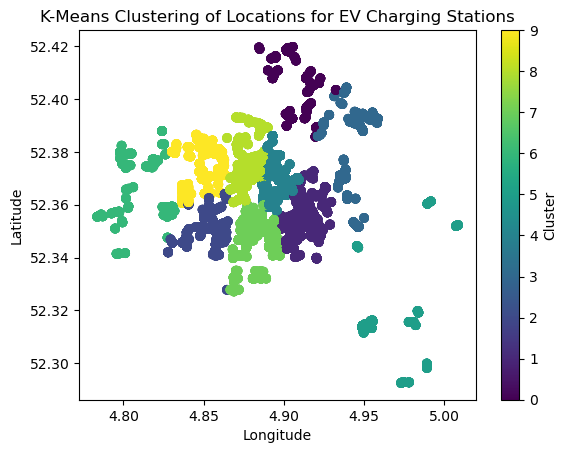

In [58]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with demand and locations
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic_with_demand.csv')

# Step 1: Extract latitude, longitude, and demand model for clustering
coords = df[['Longitude__left', 'Latitude__left']].values
demand = df['Demand_Model'].values

# Step 2: Use KMeans to cluster the locations (you can specify the number of clusters)
kmeans = KMeans(n_clusters=10, random_state=50)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(coords)

# Step 3: Plot the clusters
plt.scatter(df['Longitude__left'], df['Latitude__left'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Locations for EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [60]:
pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/17.7 MB 650.2 kB/s eta 0:00:28
   ---------------------------------------- 0.2/17.7 MB 1.7 MB/s eta 0:00:11
    --------------------------------------- 0.4/17.7 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.4/17.7 MB 2.1 MB/s eta 0:00:09
   - -------------------------------------- 0.6/17.7 MB 2.6 MB/s eta 0:00:07
   - -------------------------------------- 0.8/17.7 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/17.7 MB 3.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.4/17.7 MB 3.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.6/17.7 MB 3.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/17.7 MB 3.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.9/17.7 MB 3.5 MB/s eta 0:00:05
   ---- ---

In [3]:
import pulp
import pandas as pd

df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic_with_demand.csv')

# Step 1: Define the problem as a minimization problem
problem = pulp.LpProblem("EV_Charging_Station_Optimization", pulp.LpMinimize)

# Step 2: Define the variables for new charging stations
# Binary variable for whether a charging station is placed at each location
num_locations = len(df)
x = pulp.LpVariable.dicts("station", range(num_locations), cat='Binary')

# Step 3: Define the objective function (minimizing cost based on demand and station placement)
# We assume a cost proportional to the demand (you can adjust this to reflect infrastructure costs)
costs = df['Demand_Model']  # Example: use demand as a proxy for costs
problem += pulp.lpSum([costs[i] * x[i] for i in range(num_locations)])

# Step 4: Define the constraints (coverage constraints, budget, etc.)
# For example, ensuring that we meet a certain percentage of total demand
total_demand = df['Demand_Model'].sum()
required_coverage = 0.9  # Example: ensure we cover 90% of the total demand

problem += pulp.lpSum([df['Demand_Model'][i] * x[i] for i in range(num_locations)]) >= required_coverage * total_demand

# Step 5: Solve the optimization problem
problem.solve()

# Step 6: Extract the results
df['Station_Placement'] = [pulp.value(x[i]) for i in range(num_locations)]

# Save the updated dataset with station placement information
df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\optimized_station_locations.csv', index=False)

# Display locations with new stations
print(df[df['Station_Placement'] == 1][['street_name', 'Longitude__left', 'Latitude__left', 'Demand_Model']])


                  street_name  Longitude__left  Latitude__left  Demand_Model
0                Parnassusweg         4.868436       52.340424      4921.045
1                Parnassusweg         4.868436       52.340424      5262.445
2                Parnassusweg         4.868436       52.340424      3810.145
3                Parnassusweg         4.868436       52.340424      3749.545
4                Parnassusweg         4.868436       52.340424      4062.445
...                       ...              ...             ...           ...
32548              Nassaukade         4.875480       52.374921      1624.985
32549  2e Hugo de Grootstraat         4.874523       52.374262      3016.085
32550  2e Hugo de Grootstraat         4.874523       52.374262      3868.085
32551  2e Hugo de Grootstraat         4.874523       52.374262      3904.985
32553  2e Hugo de Grootstraat         4.874523       52.374262      4006.385

[29294 rows x 4 columns]


In [ ]:
# Normalize the Demand Model

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\merged_population_traffic_with_demand.csv')

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the Demand Model to a range of 0 to 1
df['Normalized_Demand_Model'] = scaler.fit_transform(df[['Demand_Model']])

# Save the updated dataset with the normalized demand model
df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv', index=False)

# Display the normalized demand values
print(df[['Demand_Model', 'Normalized_Demand_Model']].head())


   Demand_Model  Normalized_Demand_Model
0      4921.045                 0.352205
1      5262.445                 0.376743
2      3810.145                 0.272360
3      3749.545                 0.268005
4      4062.445                 0.290494


In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the demand dataset (e.g., with lat, long, or zip code)
demand_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Load the existing charging stations dataset
stations_df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\Charging_Station_Cleaned.csv')

# Convert both datasets to GeoDataFrames for spatial joining based on latitude and longitude
demand_gdf = gpd.GeoDataFrame(demand_df, geometry=gpd.points_from_xy(demand_df['longitude_population'], demand_df['latitude_population']))
stations_gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']))

# Set the same Coordinate Reference System (CRS) for both datasets (WGS84 for latitude/longitude)
demand_gdf.crs = 'epsg:4326'
stations_gdf.crs = 'epsg:4326'

# Perform a spatial join to match demand locations with the nearest charging stations
# Use 'lsuffix' and 'rsuffix' to avoid conflicts with the 'index_right' column
merged_gdf = gpd.sjoin_nearest(demand_gdf, stations_gdf, how='left', distance_col='distance', lsuffix='demand', rsuffix='station')

# Print the column names to check for the correct column names after the join
print(merged_gdf.columns)

# If street_name exists in one of the datasets, it might be renamed with a suffix like '_demand' or '_station'
# Assuming 'street_name_demand' is the correct column name
merged_gdf['street_name_demand'] = merged_gdf['street_name_demand'].fillna('No Station')  # Fill missing values

# Save the updated dataset
merged_gdf.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\demand_with_stations.csv', index=False)

# Display the first few rows of the updated dataset
print(merged_gdf[['street_name_demand', 'longitude_population', 'latitude_population', 'street_name_station']].head())


C:\Users\navin\anaconda3\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Index(['index__left', '_year', 'street_name_demand', 'traffc_volume',
       'daylight', 'evening', 'nightlv', 'Longitude__left', 'Latitude__left',
       'latitude_traffic', 'longitude_traffic', 'Station Name_demand',
       'Address_demand', 'Latitude__right', 'Longitude__right',
       'Connector Type_demand', 'Quantity_demand', 'Type_demand',
       'Unnamed: 7_demand', 'street_name_left', 'zip_code_demand', 'geometry',
       'index_right', 'street name', 'population', 'Street Area',
       'Population density', 'EV Vehicles', 'Regular public charging points',
       'Regular Semi-public charging points', 'Fast charging points',
       'Private charging at home',
       'Regular Public & Semi-Public Charging Points (AC):',
       'street_name_right', 'Latitude_right', 'Longitude_right',
       'latitude_pop', 'longitude_pop', 'latitude_population',
       'longitude_population', 'Demand_Model', 'Normalized_Demand_Model',
       'index_station', 'Station Name_station', 'Address_sta

In [27]:
import pandas as pd

# Load the dataset with both the Demand Model and Normalized Demand Model
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Define high demand areas using Demand Model (e.g., top 25%)
high_demand_threshold = df['Demand_Model'].quantile(0.75)  # Top 25% of Demand Model
high_demand_areas = df[df['Demand_Model'] >= high_demand_threshold]

# Step 2: Define high demand areas using Normalized Demand Model (e.g., top 25%)
high_normalized_demand_threshold = df['Normalized_Demand_Model'].quantile(0.75)  # Top 25% of Normalized Demand Model
high_normalized_demand_areas = df[df['Normalized_Demand_Model'] >= high_normalized_demand_threshold]

# Step 3: Combine the two conditions (areas that meet either or both criteria)
high_demand_combined = pd.concat([high_demand_areas, high_normalized_demand_areas]).drop_duplicates()

# Step 4: Save the filtered high demand areas to a CSV file
high_demand_combined.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\high_demand_areas.csv', index=False)

# Step 5: Display the first few rows of the high demand areas
print(high_demand_combined[['street_name', 'Demand_Model', 'Normalized_Demand_Model']].head())


    street_name  Demand_Model  Normalized_Demand_Model
0  Parnassusweg      4921.045                 0.352205
1  Parnassusweg      5262.445                 0.376743
2  Parnassusweg      3810.145                 0.272360
3  Parnassusweg      3749.545                 0.268005
4  Parnassusweg      4062.445                 0.290494


In [28]:
import pandas as pd

# Load the dataset with the Demand Model and Normalized Demand Model
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Define thresholds or quantiles for categorizing into 'High', 'Medium', 'Low'

# Using quantiles to define thresholds
bins = [0, df['Demand_Model'].quantile(0.33), df['Demand_Model'].quantile(0.66), df['Demand_Model'].max()]  # Low, Medium, High
labels = ['Low', 'Medium', 'High']

# Step 2: Classify the areas based on Demand Model into 'Low', 'Medium', 'High'
df['Demand_Category'] = pd.cut(df['Demand_Model'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Optionally, you can also classify based on Normalized Demand Model similarly
# bins_normalized = [0, df['Normalized_Demand_Model'].quantile(0.33), df['Normalized_Demand_Model'].quantile(0.66), df['Normalized_Demand_Model'].max()]
# df['Normalized_Demand_Category'] = pd.cut(df['Normalized_Demand_Model'], bins=bins_normalized, labels=labels, include_lowest=True)

# Step 4: Save the dataset with the new 'Demand_Category' column
df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\demand_with_categories.csv', index=False)

# Step 5: Display the first few rows to check the categorization
print(df[['street_name', 'Demand_Model', 'Demand_Category']].head())


    street_name  Demand_Model Demand_Category
0  Parnassusweg      4921.045            High
1  Parnassusweg      5262.445            High
2  Parnassusweg      3810.145            High
3  Parnassusweg      3749.545            High
4  Parnassusweg      4062.445            High


In [ ]:
#optimization model, clustering approach

C:\Users\navin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


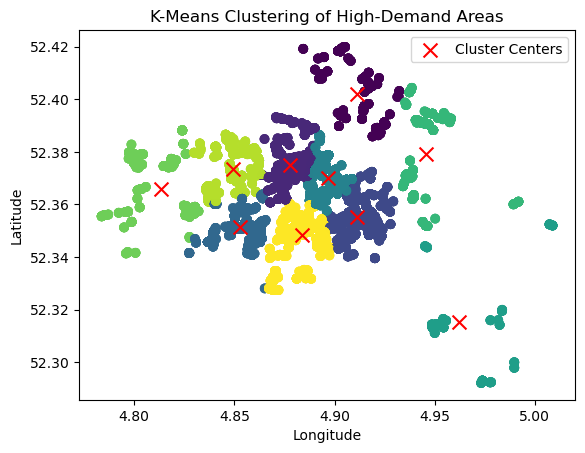

   longitude  latitude
0  52.402074  4.911276
1  52.374976  4.877882
2  52.355383  4.911050
3  52.351492  4.852598
4  52.370067  4.896537


In [29]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with demand and geographic data
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Extract coordinates (latitude and longitude) and demand for clustering
coords = df[['latitude_population', 'longitude_population']].values
demand = df['Demand_Model'].values

# Step 2: Apply K-Means clustering (you can adjust n_clusters)
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(coords)

# Step 3: Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Step 4: Visualize the clusters
plt.scatter(coords[:, 1], coords[:, 0], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('K-Means Clustering of High-Demand Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Step 5: Save the cluster centroids as potential locations for new charging stations
centroids_df = pd.DataFrame(centroids, columns=['longitude', 'latitude'])
centroids_df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cluster_centroids.csv', index=False)

# Display the centroids
print(centroids_df.head())


In [6]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with demand and geographic data
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Extract coordinates (latitude, longitude) and normalized demand for clustering
coords_and_demand = df[['latitude_population', 'longitude_population', 'Normalized_Demand_Model']].values

# Step 2: Apply K-Means clustering with normalized demand (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(coords_and_demand)

# Step 3: Get the centroids of the clusters (which now include normalized demand as well)
centroids = kmeans.cluster_centers_

# Step 4: Visualize the clusters (ignore normalized demand for plotting the map)
plt.scatter(coords[:, 1], coords[:, 0], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('K-Means Clustering of High-Demand Areas with Normalized Demand Consideration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Step 5: Save the cluster centroids as potential locations for new charging stations
centroids_df = pd.DataFrame(centroids[:, :2], columns=['longitude', 'latitude'])  # Keep only coordinates for centroids
centroids_df.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\cluster_centroids_with_normalized_demand1.csv', index=False)

# Display the centroids
print(centroids_df.head())


C:\Users\navin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



NameError: name 'coords' is not defined

In [ ]:
#Senario Analysis: Scenario 1: Moderate Demand Growth (Increase by 20%):

In [1]:
pip install glpk

     ---------------------------------------- 0.0/161.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/161.2 kB ? eta -:--:--
     ------------------- ------------------- 81.9/161.2 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 161.2/161.2 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build glpk
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [11 lines of output]
  WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
  Traceback (most recent call last):
    File "C:\Users\navin\AppData\Local\Temp\pip-build-env-fjv0ha47\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
      section = defn.get("tool", {})[tool_name]
                ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
  KeyError: 'setuptools_scm'
  running bdist_wheel
  running build
  running build_ext
  building 'glpk' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glpk
ERROR: Could not build wheels for glpk, which is required to ins

In [3]:
import pandas as pd
import pulp

# Load the original dataset
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Define the demand growth rate for Scenario 1 (20% increase)
growth_rate = 1.20
df['Demand_Model_Scenario1'] = df['Demand_Model'] * growth_rate

# Step 2: Filter locations to reduce the number of variables
threshold = df['Demand_Model_Scenario1'].quantile(0.25)  # Keep top 75% of demand locations
df_filtered = df[df['Demand_Model_Scenario1'] > threshold]

# Reset the index to avoid KeyError during optimization
df_filtered = df_filtered.reset_index(drop=True)

# Step 3: Define the optimization problem as a minimization problem
problem = pulp.LpProblem("EV_Charging_Station_Optimization_Scenario1", pulp.LpMinimize)

# Define the binary variables for whether to place a station at each location
num_locations = len(df_filtered)
x = pulp.LpVariable.dicts("station", range(num_locations), cat='Binary')

# Define the objective function (minimizing cost based on demand and station placement)
costs = df_filtered['Demand_Model_Scenario1'].values
problem += pulp.lpSum([costs[i] * x[i] for i in range(num_locations)])

# Ensure we cover at least 90% of the total demand
total_demand = df_filtered['Demand_Model_Scenario1'].sum()
required_coverage = 0.9
problem += pulp.lpSum([df_filtered['Demand_Model_Scenario1'][i] * x[i] for i in range(num_locations)]) >= required_coverage * total_demand

# Limit the maximum number of stations to place
max_stations = 50  # Example limit
problem += pulp.lpSum([x[i] for i in range(num_locations)]) <= max_stations

# Step 4: Solve the optimization problem using the default CBC solver
problem.solve(pulp.PULP_CBC_CMD())

# Extract the results for this scenario
df_filtered['Station_Placement_Scenario1'] = [pulp.value(x[i]) for i in range(num_locations)]

# Save the results for Scenario 1
df_filtered.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\optimized_station_locations_scenario1.csv', index=False)

# Display locations where new stations will be placed under Scenario 1
print(df_filtered[df_filtered['Station_Placement_Scenario1'] == 1][['street_name', 'longitude_population', 'latitude_population', 'Demand_Model_Scenario1']])


              street_name  longitude_population  latitude_population  \
0            Parnassusweg              4.868951             52.34039   
1            Parnassusweg              4.868951             52.34039   
11     Johan Huizingalaan              4.827491             52.34156   
12     Johan Huizingalaan              4.827491             52.34156   
13     Johan Huizingalaan              4.827491             52.34156   
...                   ...                   ...                  ...   
24362        De Boelelaan              4.886500             52.33495   
24363        De Boelelaan              4.886500             52.33495   
24364        De Boelelaan              4.886500             52.33495   
24365        De Boelelaan              4.886500             52.33495   
24366        De Boelelaan              4.886500             52.33495   

       Demand_Model_Scenario1  
0                   5905.2540  
1                   6314.9340  
11                  6324.5916  
12     

In [ ]:
# Scenario 2: High Traffic Volume Growth (30% Increase):


In [1]:
import pandas as pd
import pulp

# Load the dataset
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Define traffic growth rate for Scenario 2 (30% increase)
traffic_growth_rate = 1.30

# Step 2: Modify the traffic volume and recalculate the Demand Model
df['Traffic_Volume_Scenario2'] = df['traffc_volume'] * traffic_growth_rate

# Simplify Demand Model: Use only EV Vehicles and Traffic Volume
beta = 0.2   # EV vehicles weight
gamma = 0.3  # Traffic volume weight
df['Demand_Model_Scenario2'] = (beta * df['EV Vehicles'] + gamma * df['Traffic_Volume_Scenario2'])

# Step 3: Filter data to the top 50% of demand locations
threshold = df['Demand_Model_Scenario2'].quantile(0.50)
df_filtered = df[df['Demand_Model_Scenario2'] > threshold].reset_index(drop=True)

# Step 4: Define the optimization problem for Scenario 2
num_locations = len(df_filtered)
problem = pulp.LpProblem("EV_Charging_Station_Optimization_Scenario2", pulp.LpMinimize)
x = pulp.LpVariable.dicts("station", range(num_locations), cat='Binary')

# Use the modified demand for Scenario 2
costs = df_filtered['Demand_Model_Scenario2'].values
problem += pulp.lpSum([costs[i] * x[i] for i in range(num_locations)])

# Ensure 80% coverage of the total demand (instead of 90%)
total_demand = df_filtered['Demand_Model_Scenario2'].sum()
required_coverage = 0.8  # Adjusted to 80%
problem += pulp.lpSum([df_filtered['Demand_Model_Scenario2'][i] * x[i] for i in range(num_locations)]) >= required_coverage * total_demand

# Limit the maximum number of stations to place (e.g., 50 stations)
max_stations = 50  # Example limit
problem += pulp.lpSum([x[i] for i in range(num_locations)]) <= max_stations

# Step 5: Solve the optimization problem with a time limit of 5 minutes (300 seconds)
problem.solve(pulp.PULP_CBC_CMD(timeLimit=300))

# Step 6: Extract results for Scenario 2
df_filtered['Station_Placement_Scenario2'] = [pulp.value(x[i]) for i in range(num_locations)]

# Save results for Scenario 2
df_filtered.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\optimized_station_locations_scenario2.csv', index=False)

# Display results for Scenario 2
print(df_filtered[df_filtered['Station_Placement_Scenario2'] == 1][['street_name', 'longitude_population', 'latitude_population', 'Demand_Model_Scenario2']])


              street_name  longitude_population  latitude_population  \
12     Johan Huizingalaan              4.827491             52.34156   
13     Johan Huizingalaan              4.827491             52.34156   
14     Johan Huizingalaan              4.827491             52.34156   
17     Johan Huizingalaan              4.827491             52.34156   
18     Johan Huizingalaan              4.827491             52.34156   
...                   ...                   ...                  ...   
16252        De Boelelaan              4.886500             52.33495   
16253        De Boelelaan              4.886500             52.33495   
16254        De Boelelaan              4.886500             52.33495   
16255        De Boelelaan              4.886500             52.33495   
16256        De Boelelaan              4.886500             52.33495   

       Demand_Model_Scenario2  
12                    7779.48  
13                    7115.31  
14                    8283.75  
17     

In [ ]:
# Scenario 3: Shift in Traffic Patterns:

In [3]:
import pandas as pd
import pulp

# Load the dataset
df = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\normalized_population_traffic_with_demand.csv')

# Step 1: Define traffic growth and reduction rates for Scenario 3
# Assume traffic volume decreases by 20% in low-demand areas and increases by 10% in high-demand areas
df['Traffic_Volume_Scenario3'] = df['traffc_volume']  # Copy the current traffic volume

# Apply traffic pattern shifts based on demand model:
# Decrease traffic volume by 20% for low-demand areas (below 33rd percentile)
# Increase traffic volume by 10% for high-demand areas (above 66th percentile)
df.loc[df['Demand_Model'] < df['Demand_Model'].quantile(0.33), 'Traffic_Volume_Scenario3'] *= 0.8  # Decrease by 20%
df.loc[df['Demand_Model'] > df['Demand_Model'].quantile(0.66), 'Traffic_Volume_Scenario3'] *= 1.1  # Increase by 10%

# Step 2: Define weights for the demand model components
alpha = 0.1  # Weight for population density
beta = 0.2   # Weight for EV vehicles
gamma = 0.3  # Weight for traffic volume

# Recalculate Demand Model for Scenario 3 based on adjusted traffic volume
df['Demand_Model_Scenario3'] = (alpha * df['Population density'] +
                                beta * df['EV Vehicles'] +
                                gamma * df['Traffic_Volume_Scenario3'])

# Step 3: Filter data to remove rows with zero or low demand
# Focus only on significant demand areas (top 50%)
threshold = df['Demand_Model_Scenario3'].quantile(0.50)
df_filtered = df[df['Demand_Model_Scenario3'] > threshold].reset_index(drop=True)

# Step 4: Define the optimization problem for Scenario 3
num_locations = len(df_filtered)
problem = pulp.LpProblem("EV_Charging_Station_Optimization_Scenario3", pulp.LpMinimize)
x = pulp.LpVariable.dicts("station", range(num_locations), cat='Binary')

# Use the modified demand for Scenario 3
costs = df_filtered['Demand_Model_Scenario3'].values
problem += pulp.lpSum([costs[i] * x[i] for i in range(num_locations)])

# Ensure 80% coverage of the total demand (can adjust coverage requirement)
total_demand = df_filtered['Demand_Model_Scenario3'].sum()
required_coverage = 0.8  # Adjust based on desired coverage
problem += pulp.lpSum([df_filtered['Demand_Model_Scenario3'][i] * x[i] for i in range(num_locations)]) >= required_coverage * total_demand

# Limit the maximum number of stations to place (e.g., 50 stations)
max_stations = 50  # Example limit
problem += pulp.lpSum([x[i] for i in range(num_locations)]) <= max_stations

# Step 5: Solve the optimization problem with a time limit of 5 minutes (300 seconds)
problem.solve(pulp.PULP_CBC_CMD(timeLimit=300))

# Step 6: Extract results for Scenario 3
df_filtered['Station_Placement_Scenario3'] = [pulp.value(x[i]) for i in range(num_locations)]

# Save results for Scenario 3
df_filtered.to_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Final Project\optimized_station_locations_scenario3.csv', index=False)

# Display results for Scenario 3
print(df_filtered[df_filtered['Station_Placement_Scenario3'] == 1][['street_name', 'longitude_population', 'latitude_population', 'Demand_Model_Scenario3']])


              street_name  longitude_population  latitude_population  \
1            Parnassusweg              4.868951             52.34039   
11     Johan Huizingalaan              4.827491             52.34156   
12     Johan Huizingalaan              4.827491             52.34156   
13     Johan Huizingalaan              4.827491             52.34156   
14     Johan Huizingalaan              4.827491             52.34156   
...                   ...                   ...                  ...   
16251        De Boelelaan              4.886500             52.33495   
16252        De Boelelaan              4.886500             52.33495   
16253        De Boelelaan              4.886500             52.33495   
16254        De Boelelaan              4.886500             52.33495   
16255        De Boelelaan              4.886500             52.33495   

       Demand_Model_Scenario3  
1                    5771.635  
11                   5779.773  
12                   6610.053  
13     

In [4]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv('optimized_station_locations_scenario3.csv')

# Title
st.title('EV Charging Station Optimization Dashboard')

# Sidebar for filtering by demand
min_demand = st.sidebar.slider('Minimum Demand', min_value=0, max_value=int(df['Demand_Model_Scenario3'].max()), value=100)

# Filter data based on demand
filtered_df = df[df['Demand_Model_Scenario3'] >= min_demand]

# Display map using Plotly
fig = px.scatter_mapbox(filtered_df, lat="latitude_population", lon="longitude_population", 
                        color="Demand_Model_Scenario3", zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
st.plotly_chart(fig)


2024-09-30 02:17:14.374 
  command:

    streamlit run C:\Users\navin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()